In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [26]:
df = pd.read_csv(r"C:\Users\lenovo\Documents\ds\\Project - industrial health and safety analysis\industrial_safety\industrial_safety.csv")

In [27]:
df.head(20)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.7+ KB


In [29]:
df['Countries'].unique()

array(['Country_01', 'Country_02', 'Country_03'], dtype=object)

In [30]:
df['Industry Sector'].unique()

array(['Mining', 'Metals', 'Others'], dtype=object)

In [31]:
len(df['Data'].unique())

287

In [32]:
len(df['Critical Risk'].unique())

33

In [33]:
df['Critical Risk'].unique()

array(['Pressed', 'Pressurized Systems', 'Manual Tools', 'Others',
       'Fall prevention (same level)', 'Chemical substances',
       'Liquid Metal', 'Electrical installation', 'Confined space',
       'Pressurized Systems / Chemical Substances',
       'Blocking and isolation of energies', 'Suspended Loads', 'Poll',
       'Cut', 'Fall', 'Bees', 'Fall prevention', '\nNot applicable',
       'Traffic', 'Projection', 'Venomous Animals', 'Plates',
       'Projection/Burning', 'remains of choco',
       'Vehicles and Mobile Equipment', 'Projection/Choco',
       'Machine Protection', 'Power lock', 'Burn',
       'Projection/Manual Tools', 'Individual protection equipment',
       'Electrical Shock', 'Projection of fragments'], dtype=object)

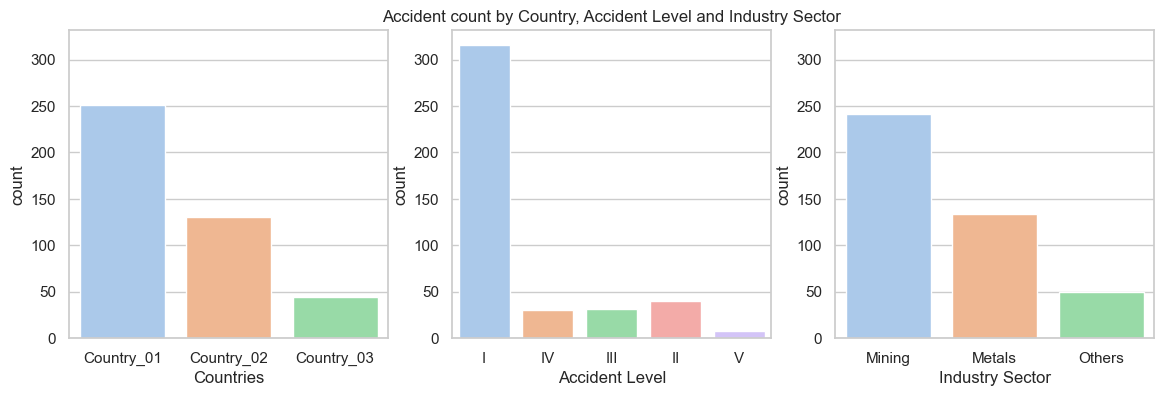

In [34]:
plt.figure(figsize=(14,4))

sns.set_theme(style = 'whitegrid', palette='pastel')


ax1 = plt.subplot(1,3,1)
sns.countplot(data=df, x='Countries', hue='Countries')

ax2 = plt.subplot(132, sharey=ax1)
sns.countplot(data=df, x='Accident Level', hue='Accident Level', legend=None)
plt.title('Accident count by Country, Accident Level and Industry Sector')

ax3 = plt.subplot(133, sharey=ax1)
sns.countplot(data=df, x='Industry Sector', hue='Industry Sector');

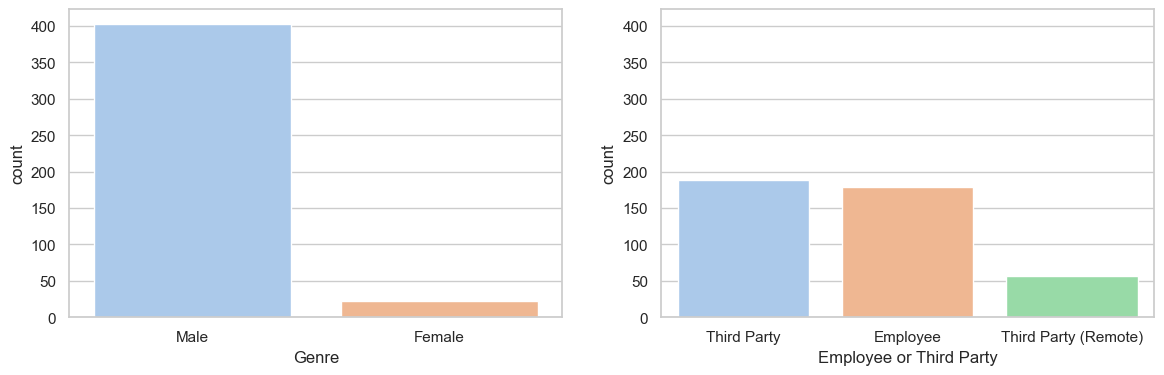

In [35]:
plt.figure(figsize=(14,4))

sns.set_theme(style = 'whitegrid', palette='pastel')

axe1 = plt.subplot(1,2,1)
sns.countplot(data=df, x='Genre', hue='Genre')

axe2 = plt.subplot(122, sharey=axe1)
sns.countplot(data=df, x='Employee or Third Party', hue='Employee or Third Party', legend=None);

In [36]:
df_plevel1  = df[df['Potential Accident Level'] == 'I']
df_plevel2 = df[df['Potential Accident Level'] == 'II']
df_plevel3 = df [df['Potential Accident Level'] == 'III']
df_plevel4 = df[df['Potential Accident Level'] == 'IV']
df_plevel5 = df[df['Potential Accident Level'] == 'V']

df_level1 = df[df['Accident Level'] == 'I']
df_level2 = df[df['Accident Level'] == 'II']
df_level3 = df[df['Accident Level'] == 'III']
df_level4 = df[df['Accident Level'] == 'IV']
df_level5 = df[df['Accident Level'] == 'V']

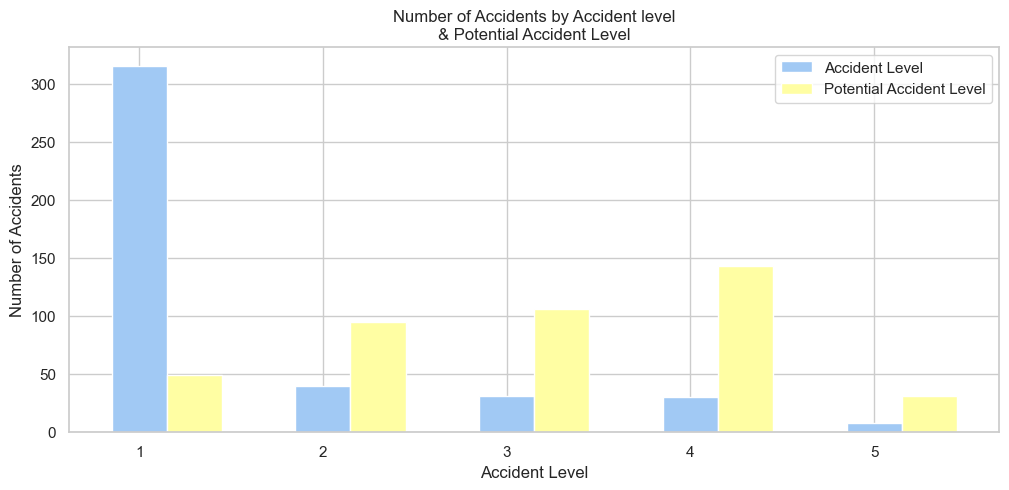

In [37]:
level1 = len(df_level1)
level2 = len(df_level2)
level3 = len(df_level3)
level4 = len(df_level4)
level5 = len(df_level5)

y_vals = [level1, level2, level3, level4, level5]
x_vals = range(1,6)


plevel_1 = len(df_plevel1)
plevel_2 = len(df_plevel2)
plevel_3 = len(df_plevel3)
plevel_4 = len(df_plevel4)
plevel_5 = len(df_plevel5)

px_vals = []
py_vals = [plevel_1, plevel_2, plevel_3, plevel_4, plevel_5]
for item in x_vals:
    px_vals.append(item+0.3)


plt.figure(figsize=(12,5))
plt.bar(x_vals, y_vals, width=0.3, label='Accident Level')
plt.bar(px_vals, py_vals, width=0.3, color='y', label='Potential Accident Level');

plt.ylabel('Number of Accidents')
plt.xlabel('Accident Level')
plt.title('Number of Accidents by Accident level\n& Potential Accident Level');
plt.legend(loc=0)

#to insert legend and axes labels

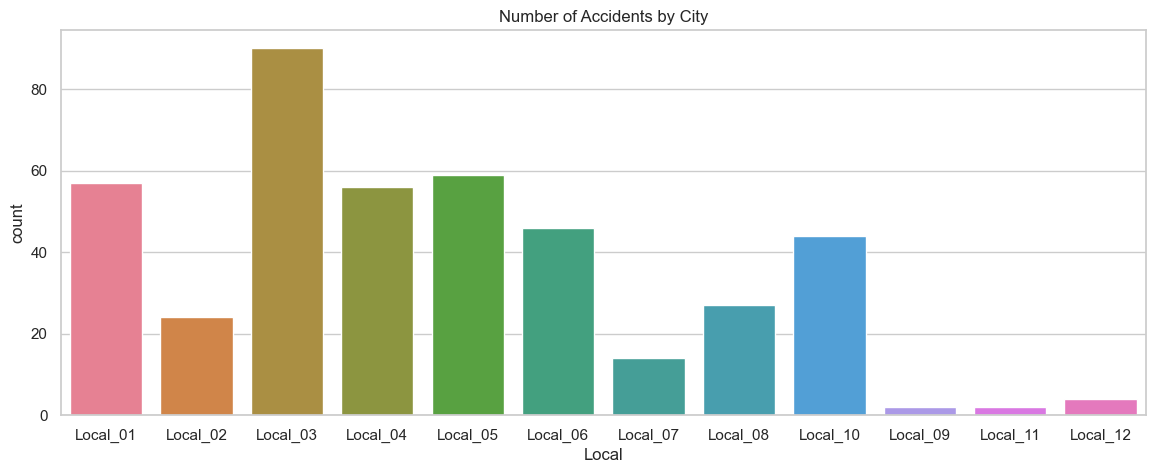

In [38]:
plt.figure(figsize=(14,5))
sns.set_theme(style = 'whitegrid', palette='pastel')
sns.countplot(data=df, x='Local', hue='Local');
plt.title('Number of Accidents by City');

In [39]:
for x in df['Accident Level']:
    if x == 'I':
        df['Accident Level'] = df['Accident Level'].replace('I', '1')
    if x == 'II':
        df['Accident Level'] = df['Accident Level'].replace('II', '2')
    if x == 'III':
        df['Accident Level'] = df['Accident Level'].replace('III', '3')
    if x == 'IV':
        df['Accident Level'] = df['Accident Level'].replace('IV', '4')
    else:
        df['Accident Level'] = df['Accident Level'].replace('V', '5')


df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,1,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,1,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,1,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,1,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,4,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [40]:
df = df.astype({'Accident Level': int})
df['Accident Level'].dtype

dtype('int64')

In [41]:
high_level_df = df[df['Accident Level'] > 2]
high_level_df.head()

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,4,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
13,13,2016-02-02 00:00:00,Country_01,Local_01,Mining,4,V,Male,Third Party,Electrical installation,"In moments that the operator of the Jumbo 2, t..."
16,16,2016-02-06 00:00:00,Country_01,Local_04,Mining,3,IV,Male,Third Party,Others,"At Rp 050 of level 1620, in circumstances wher..."
32,32,2016-02-21 00:00:00,Country_01,Local_01,Mining,3,IV,Male,Third Party,Others,The worker Yaranga while working with barretil...
33,33,2016-02-20 00:00:00,Country_01,Local_04,Mining,5,V,Male,Third Party,Others,Approximately 1:40 p.m. in circumstances that ...


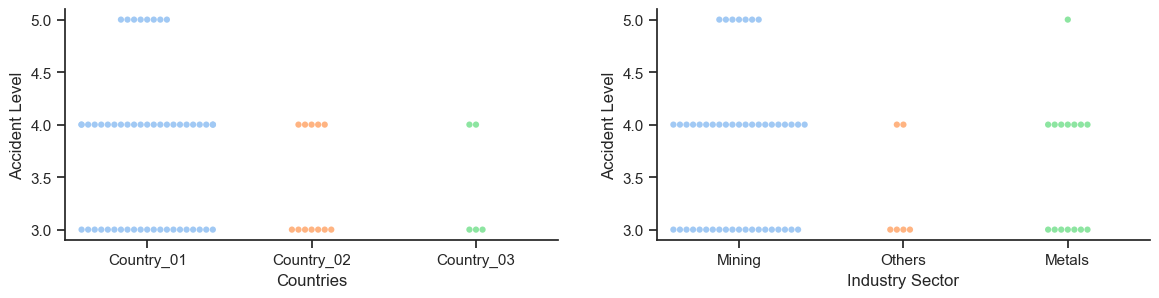

In [42]:
plt.figure(figsize=(14,3))
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style='ticks', rc=custom_params, palette='pastel')
plt.subplot(121)
sns.swarmplot(data=high_level_df, x='Countries', y='Accident Level', hue='Countries', s=4.5, legend=False)
plt.subplot(122)
sns.swarmplot(data=high_level_df, x='Industry Sector', y='Accident Level', hue='Industry Sector', s=4.5, legend=False);

EDA SUMMARY

1. Most accidents are occuring in Country_01, the mining industry and cities: Local 3,5,1 & 4. More serious accidents follow the same distribution
as well for countries and industry sectors.
- More safety training, Personal Protective Equipment and other procedural safeguards can be employed to curb these accident occurances.

2. Males, expectedly, are involved in accidents more than women given the gender distributions in the industry sectors.

3. Third party individuals seem to get injured more that fulltime employees, indicating need for rigorous safeguards for thrid parties
when they are on site or even limiting entrance onto worksites for third parties where possible.

4. Level 1 accidents are clearly the most prevalent and level 5 accidents occur the least. However, the Potential Accident Level seems to increase
with increase in level.

In [43]:
df['Data'] = pd.to_datetime(df['Data'])
df = df.drop('Unnamed: 0', axis=1)
df['Month'] = df['Data'].dt.month
df['Day of week'] = df['Data'].dt.dayofweek
df['Count'] = 1
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Month,Day of week,Count
0,2016-01-01,Country_01,Local_01,Mining,1,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1,4,1
1,2016-01-02,Country_02,Local_02,Mining,1,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1,5,1
2,2016-01-06,Country_01,Local_03,Mining,1,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1,2,1
3,2016-01-08,Country_01,Local_04,Mining,1,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1,4,1
4,2016-01-10,Country_01,Local_04,Mining,4,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,1,6,1


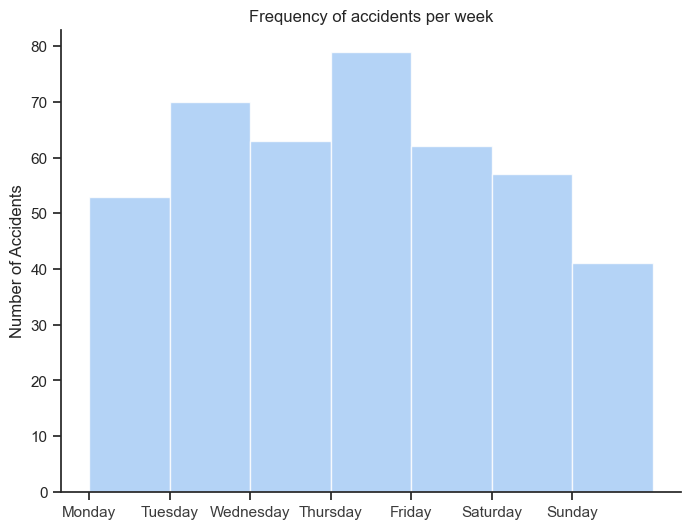

In [44]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(8,6))
plt.hist(df['Day of week'], bins=[0, 1, 2, 3, 4, 5, 6, 7], weights=df['Count'], alpha=0.8);
plt.xticks(range(7), days, alpha=0.9);
plt.ylabel('Number of Accidents');
plt.title('Frequency of accidents per week');

IT APPEARS MOST ACCIDENTS OCCUR IN THE MIDDLE OF THE WEEK, WITH THURSDAY HAVING THE HIGHEST COUNT.

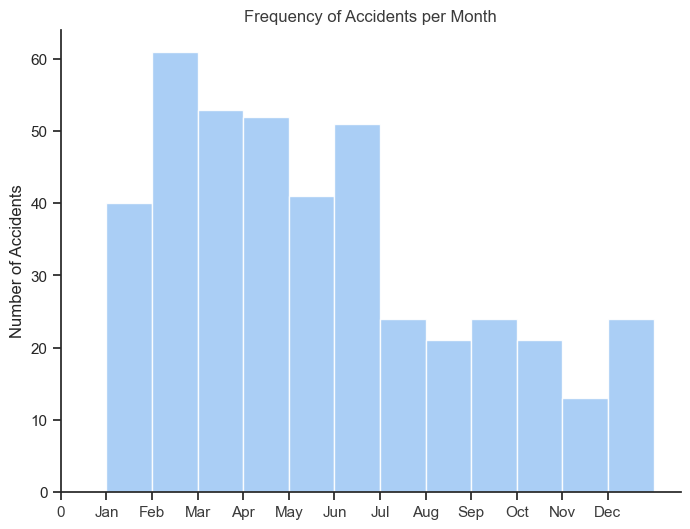

In [45]:
plt.figure(figsize=(8,6))
months2 = ['0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.hist(df['Month'], bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], weights=df['Count'], alpha=0.9);
plt.xticks(range(13), months2, alpha=0.9);
plt.ylabel('Number of Accidents');
plt.title('Frequency of Accidents per Month', alpha=0.9);


MOST ACCIDENTS SEEM TO OCCUR IN THE FIRST HALF OF THE YEAR, WITH FEBRUARY BEING THE WORST HIT MONTH.
SINCE THE COUNTRIES ARE ANONYMIZED, WE DO NOT KNOW FOR SURE HOW THE SEASONS ARE DISTRIBUTED, BUT WEATHER MAY BE PLAYING A BIG ROLE HERE.

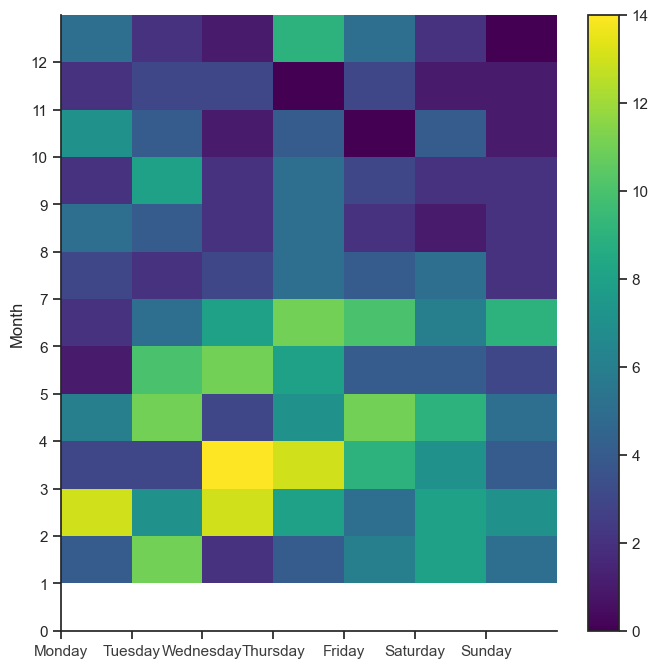

In [46]:
plt.figure(figsize=(8,8))

plt.hist2d(df['Day of week'], df['Month'], bins = [[0,1,2,3,4,5,6,7], [1,2,3,4,5,6,7,8,9,10,11,12,13]], weights=df['Count'], cmap='viridis')
plt.colorbar()
plt.xticks(range(7), days, alpha=0.9)
plt.yticks(range(13), range(13))

ax = plt.gca()

ax.set_ylabel('Month');


WEDENESDAYS IN MARCH APPEAR TO BE THE WORST DAYS AS THE MOST ACCIDENTS HAVE OCCURED ON THOSE DAYS FOR THIS PARTICULAR DATASET.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['Description'], df['Accident Level'], random_state=0, stratify=df['Accident Level'])

In [48]:
tvect = TfidfVectorizer().fit(df['Description'])

In [49]:
description_transformed = tvect.transform(df['Description'])
feat_names = tvect.get_feature_names_out()
feat_names

array(['00', '001', '007', ..., 'zinco', 'zn', 'zone'],
      shape=(3395,), dtype=object)

In [50]:
sorted_tfidfs_indexes = description_transformed.max(0).toarray()[0].argsort()

In [51]:
print('the smallest tfidf are:\n\n', feat_names[sorted_tfidfs_indexes[:10]])
print('\n\nthe largest tfidf are:\n\n', feat_names[sorted_tfidfs_indexes[-11:-1:]])

the smallest tfidf are:

 ['firmly' 'faucet' 'sutured' 'entire' 'monkey' 'composition' 'effective'
 'done' 'chestnut' 'inefficacy']


the largest tfidf are:

 ['probe' 'drawer' 'car' 'pieces' 'torch' 'bar' 'cabinet' 'beam' 'sample'
 'ripper']


In [52]:
cvect = CountVectorizer().fit(X_train)
cfeat_names = cvect.get_feature_names_out()
cfeat_names

array(['00', '001', '007', ..., 'zinco', 'zn', 'zone'],
      shape=(2948,), dtype=object)

In [53]:
dummy = DummyClassifier(strategy='most_frequent').fit(tvect.transform(X_train), y_train)

dummy_preds = dummy.predict(tvect.transform(X_test))

print('Dummy accuracy score is: ', accuracy_score(y_test, dummy_preds))

Dummy accuracy score is:  0.7476635514018691


In [54]:
dummy2 = DummyClassifier(strategy='most_frequent').fit(cvect.transform(X_train), y_train)

dummy_preds2 = dummy.predict(cvect.transform(X_test))

print('Dummy accuracy score is: ', accuracy_score(y_test, dummy_preds))

Dummy accuracy score is:  0.7476635514018691


In [55]:
model = LogisticRegression(solver='liblinear').fit(tvect.transform(X_train), y_train)

predictions = model.predict(tvect.transform(X_test))
probas = model.predict_proba(tvect.transform(X_test))

print('The roc score is :\n',  roc_auc_score(y_test, probas, average='micro', multi_class='ovr'))
print('The accuracy score is: ', accuracy_score(y_test, predictions))

The roc score is :
 0.8951873526072145
The accuracy score is:  0.7476635514018691


In [56]:
model.coef_

array([[-0.07254414, -0.09263282, -0.09181226, ...,  0.04955658,
         0.09997759, -0.07584661],
       [ 0.01269277, -0.01455021, -0.01447354, ..., -0.02207081,
        -0.05190193, -0.05036177],
       [ 0.16398092,  0.13601277, -0.01296416, ..., -0.01604727,
        -0.03569678,  0.04376287],
       [-0.08165975, -0.01392082,  0.13412178, ..., -0.01379898,
        -0.03576813,  0.09367432],
       [-0.0302998 , -0.00483224, -0.0052883 , ..., -0.00546504,
        -0.01608574, -0.01821547]], shape=(5, 3395))

In [57]:
sorted_indexes_coefs_lev1 = model.coef_[0].argsort()
sorted_indexes_coefs_lev2 = model.coef_[1].argsort()
sorted_indexes_coefs_lev3 = model.coef_[2].argsort()
sorted_indexes_coefs_lev4 = model.coef_[3].argsort()
sorted_indexes_coefs_lev5 = model.coef_[4].argsort()

print('LEV1 the smallest coeffs are:\n', feat_names[sorted_indexes_coefs_lev1[:10]])
print('\nLEV1 the largest coeffs are:\n', feat_names[sorted_indexes_coefs_lev1[:-11:-1]])

print('\n\nLEV2 the smallest coeffs are:\n', feat_names[sorted_indexes_coefs_lev2[:10]])
print('\nLEV2 the largest coeffs are:\n', feat_names[sorted_indexes_coefs_lev2[:-11:-1]])

print('\n\nLEV3 the smallest coeffs are:\n', feat_names[sorted_indexes_coefs_lev3[:10]])
print('\nLEV3 the largest coeffs are:\n', feat_names[sorted_indexes_coefs_lev3[:-11:-1]])

print('\n\nLEV4 the smallest coeffs are:\n', feat_names[sorted_indexes_coefs_lev4[:10]])
print('\nLEV4 the largest coeffs are:\n', feat_names[sorted_indexes_coefs_lev4[:-11:-1]])

print('\n\nLEV5 the smallest coeffs are:\n', feat_names[sorted_indexes_coefs_lev5[:10]])
print('\nLEV5 the largest coeffs are:\n', feat_names[sorted_indexes_coefs_lev5[:-11:-1]])

LEV1 the smallest coeffs are:
 ['of' 'rod' 'chain' 'tubing' 'against' 'cabinet' 'scoop' 'pressing' 'to'
 'probe']

LEV1 the largest coeffs are:
 ['mesh' 'when' 'from' 'in' 'collaborator' 'he' 'helmet' 'area' 'level'
 'small']


LEV2 the smallest coeffs are:
 ['the' 'at' 'on' 'with' 'is' 'he' 'mesh' 'to' 'pressed' 'operator']

LEV2 the largest coeffs are:
 ['pressing' 'against' 'cut' 'blunt' 'using' 'ring' 'face' 'forearm'
 'blade' 'bolt']


LEV3 the smallest coeffs are:
 ['when' 'he' 'from' 'activity' 'right' 'face' 'at' 'was' 'using' 'reports']

LEV3 the largest coeffs are:
 ['part' 'pump' 'chain' 'cabinet' 'tubing' 'finger' 'rod' 'inner' 'hand'
 'manually']


LEV4 the smallest coeffs are:
 ['employee' 'in' 'when' 'mesh' 'area' 'face' 'he' 'was' 'between' 'by']

LEV4 the largest coeffs are:
 ['plate' 'an' 'arm' 'steel' 'proceed' 'plates' 'manhole' 'tower' 'climbs'
 'at']


LEV5 the smallest coeffs are:
 ['the' 'causing' 'employee' 'on' 'in' 'right' 'and' 'pipe' 'by' 'finger']

LEV5 th

In [58]:
model2 = LogisticRegression(solver='liblinear').fit(cvect.transform(X_train), y_train)

predictions2 = model2.predict(cvect.transform(X_test))
print('Accuracy score is:', accuracy_score(y_test, predictions2))

Accuracy score is: 0.7102803738317757


In [59]:
coef_indexes_lev1_sorted = model2.coef_[0].argsort()
coef_indexes_lev2_sorted = model2.coef_[1].argsort()
coef_indexes_lev3_sorted = model2.coef_[2].argsort()
coef_indexes_lev4_sorted = model2.coef_[3].argsort()
coef_indexes_lev5_sorted = model2.coef_[4].argsort()

print('LEV1 the smallest coeffs are:\n', cfeat_names[coef_indexes_lev1_sorted[:10]])
print('\nLEV1 the largest coeffs are:\n', cfeat_names[coef_indexes_lev1_sorted[:-11:-1]])

print('\n\nLEV2 the smallest coeffs are:\n', cfeat_names[coef_indexes_lev2_sorted[:10]])
print('\nLEV2 the largest coeffs are:\n', cfeat_names[coef_indexes_lev2_sorted[:-11:-1]])

print('\n\nLEV3 the smallest coeffs are:\n', cfeat_names[coef_indexes_lev3_sorted[:10]])
print('\nLEV3 the largest coeffs are:\n', cfeat_names[coef_indexes_lev3_sorted[:-11:-1]])

print('\n\nLEV4 the smallest coeffs are:\n', cfeat_names[coef_indexes_lev4_sorted[:10]])
print('\nLEV4 the largest coeffs are:\n', cfeat_names[coef_indexes_lev4_sorted[:-11:-1]])

print('\n\nLEV5 the smallest coeffs are:\n', cfeat_names[coef_indexes_lev5_sorted[:10]])
print('\nLEV5 the largest coeffs are:\n', cfeat_names[coef_indexes_lev5_sorted[:-11:-1]])

LEV1 the smallest coeffs are:
 ['against' 'tubing' 'work' 'rod' 'chain' 'inside' 'cut' 'pressing'
 'remove' 'fixed']

LEV1 the largest coeffs are:
 ['when' 'from' 'collaborator' 'mesh' 'this' 'made' 'helmet' 'superficial'
 'projected' 'zinc']


LEV2 the smallest coeffs are:
 ['pressed' 'injury' 'material' 'pump' 'fell' 'with' 'on' 'is' 'in'
 'superficial']

LEV2 the largest coeffs are:
 ['using' 'against' 'cut' 'and' 'pressing' 'face' 'blade' 'pressure' 'ring'
 'forearm']


LEV3 the smallest coeffs are:
 ['when' 'from' 'right' 'at' 'activity' 'using' 'hit' 'collaborator'
 'employee' 'face']

LEV3 the largest coeffs are:
 ['part' 'to' 'tubing' 'chain' 'hand' 'manually' 'cabinet' 'pump' 'inner'
 'rod']


LEV4 the smallest coeffs are:
 ['employee' 'when' 'in' 'finger' 'area' 'part' 'time' 'made' 'between'
 'mesh']

LEV4 the largest coeffs are:
 ['plate' 'arm' 'steel' 'an' 'meters' 'proceed' 'protector' 'tower'
 'position' 'as']


LEV5 the smallest coeffs are:
 ['employee' 'causing' 'on' '

In [60]:
clf = RandomForestClassifier(random_state=0).fit(tvect.transform(X_train), y_train)

important_features_indices = clf.feature_importances_.argsort()
clf_preds = clf.predict(tvect.transform(X_test))

print('The accuracy score is: ', accuracy_score(y_test, clf_preds))
print('the top 20 most important features are: ', feat_names[important_features_indices[:-31:-1]])

The accuracy score is:  0.7383177570093458
the top 20 most important features are:  ['tubing' 'using' 'of' 'proceed' 'against' 'pressing' 'rod' 'and' 'blunt'
 'chain' 'work' 'finger' 'pressure' 'at' 'to' 'forearm' 'cut' 'the' 'wall'
 'causing' 'alone' 'an' 'close' 'release' 'injuries' '05' 'stop' 'scoop'
 'under' 'moving']


In [61]:
clf = RandomForestClassifier(random_state=0).fit(cvect.transform(X_train), y_train)

important_features_indices = clf.feature_importances_.argsort()
print('the top 20 most important features are: ', feat_names[important_features_indices[:-31:-1]])

the top 20 most important features are:  ['silver' 'brapdd' 'avoiding' 'people' 'electrician' 'emergency' 'move'
 'mário' 'laden' 'murilo' 'lime' 'striking' 'protruding' 'ball' 'enoc'
 'blackjack' 'sanding' 'advances' 'access' 'oven' 'crane' 'adjoining'
 'canvas' 'serious' 'distal' 'fuses' 'messrs' 'platform' 'anchorage'
 'hold']


NLP & MACHINE LEARNING SUMMARY

1. There is a massive class imbalance which explains the decent performance of the dummy classifiers
2. The machine learning models on default parameters perfomed worse than the dummy classifiers on accuracy indicating need for further
hyperparameter tuning or feature addition.
3. From the random forest classifier, features such as finger and forearm were some of the most informative features. The same features seemed
to have some of the highest coeffients with tfidf and count vectorizer indicating a significance of around hand related injuries.
4. In as much as alot of useful information can be gathered from accident descrriptions, using them to predict accidents is not very
wise and descriptions are only written after accidents have occured, therefore what is more helpful is to understand the circumstances just before
the accident occurs. A good suggestion is make sure that these descriptions capture as much of this information as possible.